In [12]:
%matplotlib inline

from skimage.io import imread, imsave, imshow
from skimage import img_as_float
import matplotlib.pyplot as plt
import numpy as np

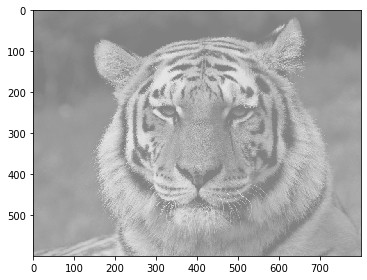

In [3]:
img = imread('images/tiger-low-contrast.png')
imshow(img)

In [4]:
img_array = np.ravel(img)

<function matplotlib.pyplot.show>

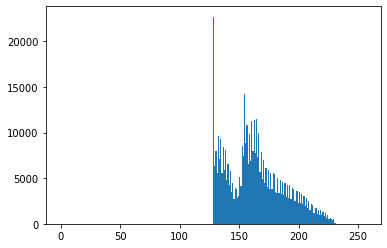

In [5]:
plt.hist(img_array, range(257))
plt.show

In [14]:
contrast_img = (img - img.min()) * 255. / (img.max() - img.min())

In [15]:
contrast_img.max()

255.0

In [16]:
contrast_img = contrast_img.astype('uint8')

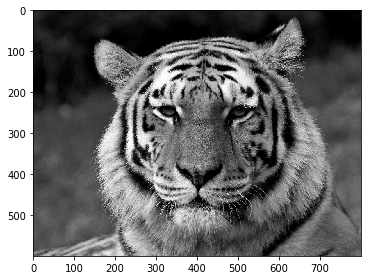

In [17]:
imshow(contrast_img)

In [19]:
contrast_array = np.ravel(contrast_img)

<function matplotlib.pyplot.show>

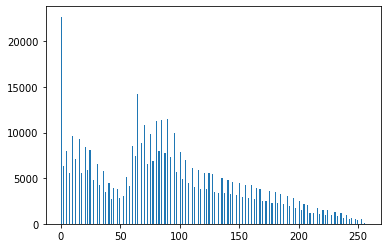

In [20]:
plt.hist(contrast_array, range(257))
plt.show

стабильный автоконтраст

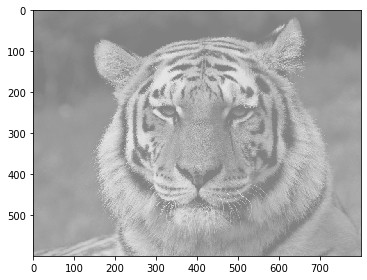

In [64]:
imshow(img)

In [67]:
n_pix = img.shape[0] * img.shape[1]
n_pix

480000

In [84]:
k = round(0.05 * n_pix)
k

24000.0

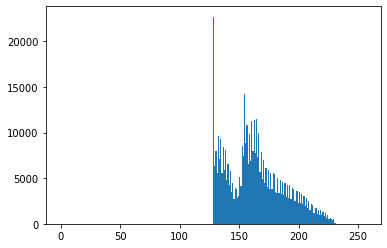

In [77]:
values, bin_edges, patches = plt.hist(img.ravel(), bins=range(257))

In [80]:
values

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
      

In [81]:
bin_edges

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [88]:
counter = 0
for i in range(256):
    counter += values[i]
    if counter > k:
        x_min = i
        break

In [89]:
x_min

129

In [99]:
counter = 0
for i in range(255, -1, -1):
    counter += values[i]
    if counter > k:
        x_max = i
        break

In [100]:
x_max

208

In [178]:
img_32 = img.astype('int32')

In [181]:
img_32

array([[144, 141, 141, ..., 128, 128, 128],
       [142, 143, 144, ..., 128, 128, 128],
       [142, 142, 140, ..., 128, 128, 128],
       ...,
       [172, 166, 168, ..., 178, 175, 170],
       [166, 167, 167, ..., 171, 172, 175],
       [166, 168, 167, ..., 174, 175, 174]], dtype=int32)

In [182]:
stable_contrast = (img_32 - x_min) * 255. / (x_max - x_min)

In [184]:
stable_contrast = np.clip(stable_contrast, 0, 255)

In [186]:
stable_contrast = stable_contrast.astype('uint8')

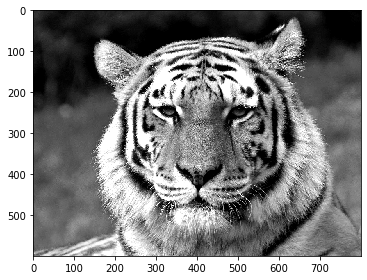

In [188]:
imshow(stable_contrast)

<function matplotlib.pyplot.show>

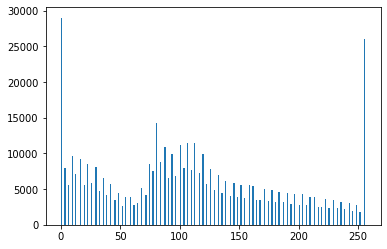

In [189]:
plt.hist(stable_contrast.ravel(), bins=range(257))
plt.show

In [194]:
sorted_img = img.ravel()


In [199]:
list(sorted_img).sort()